# **Artificial Neural Networks**

Artificial Neural Networks contains artificial neurons which are called units. These neurons receive sensory input from the outside world which they process and then provide the output which might act as the input to the next neuron. <br>
The activation function for output is 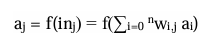 called sigmoid perceptron.

In [8]:
import numpy as np

class ArtificialNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

        # Initialize biases
        self.bias_hidden = np.random.rand(self.hidden_size)
        self.bias_output = np.random.rand(self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X, y):
        for _ in range(self.epochs):
            # Forward propagation
            hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_output = self.sigmoid(hidden_input)

            final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
            final_output = self.sigmoid(final_input)

            # Backward propagation
            error = y - final_output
            d_output = error * self.sigmoid_derivative(final_output)

            error_hidden = d_output.dot(self.weights_hidden_output.T)
            d_hidden = error_hidden * self.sigmoid_derivative(hidden_output)

            # Update weights and biases
            self.weights_hidden_output += hidden_output.T.dot(d_output) * self.learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden) * self.learning_rate
            self.bias_output += np.sum(d_output, axis=0) * self.learning_rate
            self.bias_hidden += np.sum(d_hidden, axis=0) * self.learning_rate

    def predict(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)

        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)

        return final_output

In [9]:
# Testing case
if __name__ == "__main__":
    # Example dataset for XOR problem
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    nn = ArtificialNeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=10000)

    nn.fit(X, y)

    predictions = nn.predict(X)
    print("Predictions:")
    print(predictions)

Predictions:
[[0.06269286]
 [0.94067371]
 [0.94158076]
 [0.06455238]]
